In [20]:
# Load dataset

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

churn_od = pd.read_csv('Churn_OD.txt', delimiter = "|", encoding= 'unicode_escape')
churn_user_profile = pd.read_csv('Churn_UsersProfile.txt', delimiter = "|", encoding= 'unicode_escape')

In [21]:
#load_data
df_od =  pd.read_csv('Churn_OD.txt', sep='|'  , engine='python')
df_user = pd.read_csv('Churn_UsersProfile.txt', sep='|'  , engine='python')

churn_user_profile_copy = churn_user_profile.copy()

tmp = churn_user_profile_copy.merge(
    churn_user_profile_copy, on=[
        'Region_of_Origin', 
        'District_of_Origin', 
        'County_of_Origin',
        'GenderDescription',  # Replace by aggregate_variables 
        'AgeClassDescription'
    ], how='left'
)

# Keep rows where period_x is different from period_y, and period_x is in 2019
tmp = tmp[tmp.Period_x != tmp.Period_y]
tmp = tmp[tmp.Period_x == 'Sep-19 to Feb-20']

tmp['Relative_Change_AverageBusUsers'] = (tmp['Average_BusUsers_per_Day_y'] - tmp['Average_BusUsers_per_Day_x'])/(tmp['Average_BusUsers_per_Day_x'])
tmp['Relative_Change_AverageBusUsers_Abs'] = np.abs((tmp['Average_BusUsers_per_Day_y'] - tmp['Average_BusUsers_per_Day_x']))/(tmp['Average_BusUsers_per_Day_x'])
daily_users_changes = tmp

In [22]:
churn_od_std_demand = churn_od.groupby(['Region_of_Origin', 'District_of_Origin', 'County_of_Origin'])['Demand_weight'].std().reset_index()

churn_od_std_demand.rename(columns = {'Demand_weight': 'std_demand_weight'}, inplace=True)

In [23]:
churn_od_std_demand.sort_values(by=['std_demand_weight'], ascending=[False])

,Region_of_Origin,District_of_Origin,County_of_Origin,std_demand_weight
22,R2 - AM Porto,Aveiro,Vale de Cambra,0.137990
9,R1 - AM Lisboa,Setúbal,Alcochete,0.118616
19,R2 - AM Porto,Aveiro,Oliveira de Azeméis,0.110216
18,R2 - AM Porto,Aveiro,Espinho,0.096775
28,R2 - AM Porto,Porto,Póvoa de Varzim,0.065145
20,R2 - AM Porto,Aveiro,Santa Maria da Feira,0.061624
30,R2 - AM Porto,Porto,Trofa,0.061456
29,R2 - AM Porto,Porto,Santo Tirso,0.058835
33,R2 - AM Porto,Porto,Vila do Conde,0.058802
12,R1 - AM Lisboa,Setúbal,Moita,0.055400


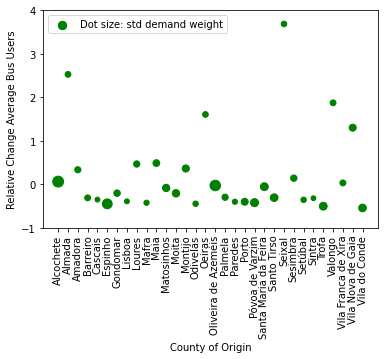

In [43]:
tmp = daily_users_changes.groupby('County_of_Origin')['Relative_Change_AverageBusUsers'].mean().reset_index()
tmp = tmp.merge(churn_od_std_demand)

y=tmp['Relative_Change_AverageBusUsers'].to_numpy()
x=tmp['County_of_Origin'].to_numpy()
ss=tmp['std_demand_weight']

fig = plt.figure()
plt.scatter(x,y,s=ss*1000,c='green',label='Dot size: std demand weight')
plt.xticks(rotation=90)
plt.yticks(np.arange(-1, 5, 1))
plt.xlabel('County of Origin')
plt.ylabel('Relative Change Average Bus Users')
plt.legend()
plt.show()
